<a href="https://colab.research.google.com/github/Armando1701/UTEC_Phyton_Jorge/blob/main/Pandas_(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Pandas con Python

Elaborado por: Jhonatan Camasca

Este notebook reúne los principales conceptos y herramientas de pandas organizados por temas, con explicaciones, ejemplos comentados y ejercicios seleccionados.

---

##  Estructura del contenido

### pandas
1. Introducción a pandas
2. Series y DataFrames
3. Acceso a datos (`loc`, `iloc`)
4. Estadísticas descriptivas
5. Manipulación de filas y columnas
6. Agrupamiento y agregación (`groupby`)
7. Manejo de valores nulos
8. Eliminación de duplicados
9. Unión y concatenación de DataFrames
10. Ejercicios prácticos integradores



## Introducción a pandas

### Acerca de pandas

Pandas es un paquete de Python diseñado para estructuras de datos rápidas, flexibles y expresivas que facilita el trabajo con datos relacionales o etiquetados.

Su objetivo es ser una herramienta fundamental para el análisis práctico de datos en Python, con el objetivo general de ser la herramienta de análisis de datos de código abierto más potente y flexible disponible en cualquier lenguaje.

**Origen del nombre**:  
El nombre *pandas* proviene de la expresión **“panel data”**, un término utilizado en econometría para describir conjuntos de datos que co series temporales para múltiples individuos.

### ¿Por qué usar pandas?

pandas es una librería ideal para el manejo de:

- **Datos tabulares** (como hojas de Excel o tablas SQL)
- **Series temporales** (ordenadas o no en el tiempo)
- **Matrices etiquetadas** (homogéneas o heterogéneas)
- **Datos estadísticos o de observación**

Además, como pandas está construido sobre NumPy, se integra fácilmente con múltiples librerías científicas del ecosistema Python.

### Importación de las librerías
Para utilizar pandas primero se debe importar la biblioteca. En el caso de Google Colab, viene preinstalado por defecto y solo se debe de importar. Pandas funciona con arrays de NumPy, por lo que se deben de importar ambos paquetes. Si se trabajara localmente y aún no se ha instalado, se puede hacer ejecutando `!pip install numpy` y `!pip install pandas` desde una celda de código.

In [ ]:
#Importación de librerías
import numpy as np
import pandas as pd
from statistics import mode

## Series y Dataframes

pandas ofrece dos estructuras fundamentales para el manejo de datos:

- **`Series`**: es una estructura unidimensional similar a un arreglo (array), con etiquetas o índices asignados a cada valor. Normalment se le puede asociar como una columna de una tabla.

- **`DataFrame`**: es una estructura bidimensional similar a una hoja de cálculo o tabla SQL. Está compuesta por múltiples `Series`, cada una representando una columna.

Ambas estructuras son altamente optimizadas y permiten operaciones vectorizadas, indexación flexible y análisis eficiente.

### Crear una `Serie` en pandas

Una `Serie` puede construirse a partir de distintos tipos de datos:

#### Desde una lista o array:

Se utiliza el comando pd.Series(data) con la lista de datos que se quiere convertir en Serie.


In [ ]:
s = pd.Series([10, 20, 30])
s

,0
0,10
1,20
2,30


In [ ]:
pd.Series([1,2,3,4,5,6,7,8,9,10])

,0
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [ ]:
pd.Series(['hola','buenos dias', 'buenas noches'])

,0
0,hola
1,buenos dias
2,buenas noches


#### Desde un diccionario
Se usan las claves como índices:

In [ ]:
s = pd.Series({'a': 100, 'b': 200, 'c': 300})
s

,0
a,100
b,200
c,300


#### Directamente en la función
Se puede agregar los datos directamente con índices personalizados en el argumento "index":

In [ ]:
s = pd.Series([5, 10, 15], index=['x', 'y', 'z'])
s

,0
x,5
y,10
z,15


### Formas de crear un Dataframe
En pandas, existen diferentes maneras de crear un Dataframe, lo que da flexibilidad a los usuarios de poder organizar datos de diferentes fuentes.



#### Desde un diccionario de listas o arrays:
Una forma común de crear un `DataFrame` es a partir de un diccionario, donde cada clave representa una columna y los valores corresponden a sus datos. Este método es flexible y útil cuando se parte de datos estructurados en formato diccionario.

**Sintaxis:** pd.DataFrame(data), donde data corresponde al diccionario que se desea convertir en DataFrame

In [ ]:
# Creación de un DataFrame desde un diccionario
data = {'Nombre': ['Alfa', 'Bravo', 'Charlie'],
        'Edad': [35, 30, 25],
        'Ciudad': ['Lima', 'Trujillo', 'Arequipa']}
df_dict = pd.DataFrame(data)

print("DataFrame creado de un diccionario:")
df_dict

DataFrame creado de un diccionario:


,Nombre,Edad,Ciudad
0,Alfa,35,Lima
1,Bravo,30,Trujillo
2,Charlie,25,Arequipa


#### Desde un array de NumPy

También es posible crear un `DataFrame` a partir de un array de NumPy.  
Esta opción es útil para trabajar con datos numéricos, aprovechando la eficiencia de cálculo y almacenamiento que ofrece NumPy.

**Sintaxis:** pd.DataFrame(data, columns, index)

data = arreglo de Numpy que se desea convertir en DataFrame

columns = Etiquetas para cada columna

index = Etiquetas para cada fila

In [ ]:
# Creación de un DataFrame desde un array de NumPy
temperature_data = np.array([[25, 30, 20], [28, 32, 22], [23, 29, 19]])
df_temperature = pd.DataFrame(temperature_data,
                              columns=['Lunes', 'Martes', 'Miércoles'],
                              index=['Lima', 'Trujillo', 'Arequipa'])
print("DataFrame creado desde un array de Numpy:")
print(df_temperature)

DataFrame creado desde un array de Numpy:
          Lunes  Martes  Miércoles
Lima         25      30         20
Trujillo     28      32         22
Arequipa     23      29         19


#### Desde `Series`

Es posible construir un `DataFrame` combinando varias `Series` como columnas.  
Esta forma permite alinear datos de forma flexible y conservar etiquetas o índices definidos previamente.

**Sintaxis:** pd.concat([serie1,serie2, serie3, ...], axis)

Con pd.concat se concatean todas las series y se escoge en qué eje se ordenarán.

In [ ]:
# Crear un DataFrame desde series de pandas:
sales_q1 = pd.Series([900, 900, 1200], name='Q1',
                     index=['Producto A', 'Producto B', 'Producto C'])
sales_q2 = pd.Series([4540, 200, 1300], name='Q2',
                     index=['Producto A', 'Producto B', 'Producto C'])
sales_q3 = pd.Series([8900, 700, 1400], name='Q3',
                     index=['Producto A', 'Producto B', 'Producto C'])
df_sales = pd.concat([sales_q1, sales_q2, sales_q3], axis=1)
print("DataFrame desde series de pandas:")
print(df_sales)

DataFrame desde series de pandas:
              Q1    Q2    Q3
Producto A   900  4540  8900
Producto B   900   200   700
Producto C  1200  1300  1400


#### Ejercicio 1

Crea un `DataFrame` a partir de un diccionario donde las claves representen países y los valores su población estimada.

Países y poblaciones:

- México: 128,455,567  
- Brasil: 216,422,446  
- Argentina: 46,234,830  
- Colombia: 52,215,503  
- Perú: 34,626,000  
- Chile: 19,826,651  
- Venezuela: 28,838,499  
- Bolivia: 12,006,031  
- Ecuador: 17,799,000  
- Guatemala: 18,092,026


##### Solución:

In [ ]:
import pandas as pd

# La información de organiza en un diccionario con países y sus poblaciones
datos_poblacion = {
    'País': [
        'México', 'Brasil', 'Argentina', 'Colombia', 'Perú',
        'Chile', 'Venezuela', 'Bolivia', 'Ecuador', 'Guatemala'
    ],
    'Población': [
        128455567, 216422446, 46234830, 52215503, 34626000,
        19826651, 28838499, 12006031, 17799000, 18092026
    ]
}

# Se crea el DataFrame
df_poblacion = pd.DataFrame(datos_poblacion)

df_poblacion

,País,Población
0,México,128455567
1,Brasil,216422446
2,Argentina,46234830
3,Colombia,52215503
4,Perú,34626000
5,Chile,19826651
6,Venezuela,28838499
7,Bolivia,12006031
8,Ecuador,17799000
9,Guatemala,18092026


#### Ejercicio 2
Construye un `DataFrame` a partir de objetos `Series` de pandas que representen la temperatura promedio en distintas ciudades latinoamericanas durante tres días de la semana.

Ciudades, días y temperaturas (°C):

- Lima: Lunes(22), Martes(23), Miércoles(21)  
- Bogotá: Lunes(14), Martes(15), Miércoles(13)  
- Buenos Aires: Lunes(18), Martes(19), Miércoles(17)



##### Solución:


In [ ]:
import pandas as pd

# Series con temperaturas por ciudad
lima = pd.Series({'Lunes': 22, 'Martes': 23, 'Miércoles': 21})
bogota = pd.Series({'Lunes': 14, 'Martes': 15, 'Miércoles': 13})
buenos_aires = pd.Series({'Lunes': 18, 'Martes': 19, 'Miércoles': 17})

# Crear DataFrame a partir de Series
df_temperaturas = pd.DataFrame({
    'Lima': lima,
    'Bogotá': bogota,
    'Buenos Aires': buenos_aires
})

df_temperaturas

,Lima,Bogotá,Buenos Aires
Lunes,22,14,18
Martes,23,15,19
Miércoles,21,13,17


### Personalización del índice en `Series`

El índice es una parte fundamental de una `Series`, ya que permite identificar y acceder a los elementos de forma eficiente.  
Si no se especifica un índice al crearla, pandas asigna automáticamente un índice entero que comienza en 0.

Puedes definir explícitamente un índice al crear una serie. Este índice puede ser cualquier tipo, como cadenas, fechas o incluso una combinación de diferentes tipos.

In [ ]:
# Maneras de crear un índice personalizado
num = [2, 3, 5, 7, 13]
data = pd.Series(num,
                 index=['a', 'b', 'c', 'd', 'e']) #Definidiendolo directamente

data1 = pd.Series(num, index=num) #Utilizando una lista con el mismo largo
print(data, "\n")
print(data1)

a     2
b     3
c     5
d     7
e    13
dtype: int64 

2      2
3      3
5      5
7      7
13    13
dtype: int64


### Modificación del índice
Se puede modificar el índice de una Serie existente utilizando el método `rename()` o configurando directamente el atributo `index`.

In [ ]:
data = pd.Series([1, 2, 3, 4, 5], index=['a', 'b', 'c', 'd', 'e'])  # Serie original
print("Serie original:\n", data)

# Cambiar un valor específico del índice usando rename()
data = data.rename({'d': 'ff', 'e': 'gg'})  # Renombrar índices 'd' y 'e'
print("\nSerie con índices modificados:\n", data)

Serie original:
 a    1
b    2
c    3
d    4
e    5
dtype: int64

Serie con índices modificados:
 a     1
b     2
c     3
ff    4
gg    5
dtype: int64


In [ ]:
# Asignar un nuevo índice completo a la Serie
data.index = ['x', 'y', 'z', 'w', 'v']
print("\nSerie con índice reasignado completamente:\n", data)


Serie con índice reasignado completamente:
 x    1
y    2
z    3
w    4
v    5
dtype: int64


### Índices duplicados
A diferencia de muchas estructuras de datos, Pandas Series permite índices duplicados. Esto puede ser útil para agrupar o trabajar con datos categóricos.

In [ ]:
data = pd.Series([1, 2, 3, 4, 5],
                 index = ['a', 'a', 'b', 'b', 'b']) #Existen nombres de índices duplicados
data

,0
a,1
a,2
b,3
b,4
b,5


In [ ]:
data['a']

,0
a,1
a,2


#### Ejercicio
Crea una `Series` en pandas con los valores `[10, 20, 30, 40, 50]` y los índices personalizados `['a', 'b', 'c', 'd', 'e']`.


##### Solución:

In [ ]:
import pandas as pd

# Series con valores e índices personalizadas
valores = [10, 20, 30, 40, 50] #Lista de valores
indices = ['a', 'b', 'c', 'd', 'e'] #Lista de índices (mismo tamaño)

serie = pd.Series(valores, index=indices)

print(serie)

a    10
b    20
c    30
d    40
e    50
dtype: int64


## Funciones útiles
Obtener información rápida de un DataFrame es esencial en la exploración y el análisis de datos. La función que brinda esta informción básica es `info()`, la cual proporciona un resumen conciso del DataFrame, incluyendo los tipos de datos de cada columna y el número de valores no nulos. Esta función es especialmente útil para comprender la estructura del DataFrame e identificar valores faltantes.

Para explicar las funciones se trabajará con el siguiente DataFrame:

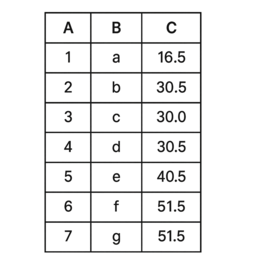

In [ ]:
import numpy as np
import pandas as pd

# Dataset de prueba
data = {
    'A': [1, 2, 3, 4, 5, 7, 9],
    'B': ['a', 'b', 'c', 'd', 'e', 'f', 'g'],
    'C': [16.5, 20.5, 30.5, 40.5, 50.5, 58, 51.5]
}
df = pd.DataFrame(data)
print('DataFrame')
df

DataFrame


,A,B,C
0,1,a,16.5
1,2,b,20.5
2,3,c,30.5
3,4,d,40.5
4,5,e,50.5
5,7,f,58.0
6,9,g,51.5


Además, los métodos `head()` y `tail()` permiten visualizar rápidamente las primeras o últimas filas de un `DataFrame`.  
Son útiles para explorar la estructura de los datos sin necesidad de mostrar todo el conjunto, especialmente cuando se trabaja con grandes volúmenes de información.

In [ ]:
# Mostrar el resumen de la información del data frame
print('The structure of the DataFrame')
print(df.info())

The structure of the DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       7 non-null      int64  
 1   B       7 non-null      object 
 2   C       7 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 300.0+ bytes
None


In [ ]:
# Mostrar las primeras 5 filas del DataFrame
print('Primeras 5 filas del DataFrame')
df.head(10)

Primeras 5 filas del DataFrame


,A,B,C
0,1,a,16.5
1,2,b,20.5
2,3,c,30.5
3,4,d,40.5
4,5,e,50.5
5,7,f,58.0
6,9,g,51.5


In [ ]:
print('Primeras 3 filas del DataFrame')
df.head(10) # Como argumento de df.head() se puede especificar la cantidad de filas que se desean mostrar

Primeras 3 filas del DataFrame


,A,B,C
0,1,a,16.5
1,2,b,20.5
2,3,c,30.5
3,4,d,40.5
4,5,e,50.5
5,7,f,58.0
6,9,g,51.5


In [ ]:
# Mostrar las últimas filas
print('Últimas 5 filas del DataFrame') #Últimas 5 filas
#print(df.tail(), "\n")
print('Últimas 3 líneas del DataFrame')
df.tail(5) #Con el argumento se puede seleccionar la cantidad de filas que se desean mostrar

Últimas 5 filas del DataFrame
Últimas 3 líneas del DataFrame


,A,B,C
2,3,c,30.5
3,4,d,40.5
4,5,e,50.5
5,7,f,58.0
6,9,g,51.5



#### Ejercicio
Muestra las primeras dos filas y las últimas 4 del Dataframe





##### Solución:

In [ ]:
import pandas as pd

datos = {
    'Nombre': ['Ana', 'Luis', 'Carlos', 'Valeria', 'Jorge', 'Sofía', 'Mateo'],
    'Edad': [25, 30, 35, 40, 45, 28, 23],
    'Ciudad': ['Lima', 'Buenos Aires', 'Bogotá', 'Quito', 'Santiago', 'Ciudad de México', 'La Paz']
}

df = pd.DataFrame(datos)

# Mostrar las primeras 2 filas
print(df.head(2))
print("\n")
# Mostrar las últimas 4 filas
print(df.tail(4))

  Nombre  Edad        Ciudad
0    Ana    25          Lima
1   Luis    30  Buenos Aires


    Nombre  Edad            Ciudad
3  Valeria    40             Quito
4    Jorge    45          Santiago
5    Sofía    28  Ciudad de México
6    Mateo    23            La Paz


In [ ]:
print(df.tail(4))

    Nombre  Edad            Ciudad
3  Valeria    40             Quito
4    Jorge    45          Santiago
5    Sofía    28  Ciudad de México
6    Mateo    23            La Paz


## Accesso a elementos del DataFrame utilizando etiquetas

Para acceder a datos dentro de un `DataFrame`, pandas ofrece la opción de seleccionar una o varias filas, columnas, subconjuntos o incluso celdas específicas.

Cuando usamos **etiquetas** (nombres de filas o columnas), las dos formas principales son:

- **`.loc[]`**: permite acceder a filas, columnas o subconjuntos usando etiquetas. Es flexible y se utiliza para rangos o combinaciones.
- **`.at[]`**: está optimizado para acceder o modificar un único valor (una celda específica). Es más rápido que `.loc[]` cuando se trabaja con un solo dato.

Utilizaremos el siguiente DataFrame para los ejemplos:

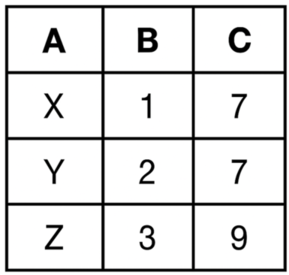

In [ ]:
import pandas as pd

# DataFrame para los ejemplos
data = {'A': [1, 2, 3],
        'B': [4, 5, 6],
        'C': [7, 8, 9]}
df = pd.DataFrame(data, index=['X', 'Y', 'Z'])

df

,A,B,C
X,1,4,7
Y,2,5,8
Z,3,6,9


In [ ]:
# Acceso a una fila utilizando etiquetasAccediendo a una fila utilizando etiquetas

df.loc['Y'] #Se accede a todos los elementos de la fila Y

,Y
A,2
B,5
C,8


In [ ]:
# Múltiple acceso con etiquetas
print('Accediendo a múltiples filas utilizando etiquetas')
df.loc[['X', 'Z']] #El argumento de df.loc pasa a ser la lista de filas de interés

Accediendo a múltiples filas utilizando etiquetas


,A,B,C
X,1,4,7
Z,3,6,9


In [ ]:
# Acceso a una columna con etiquetas
print('Accediendo a una columna utilizando etiquetas')
df['B']#Se accede a todos los elementos de una columna, no necesita de df.loc

Accediendo a una columna utilizando etiquetas


,B
X,4
Y,5
Z,6


In [ ]:
# Acceso a múltiples columnas con etiquetas
print('Accediendo a una múltiples columnas utilizando etiquetas')
df[['A', 'C']]#Como argumento se ingresa la lista de columnas a la que se desea acceder

Accediendo a una múltiples columnas utilizando etiquetas


,A,C
X,1,7
Y,2,8
Z,3,9


In [ ]:
# Accediendo a un sub-dataframe (filas y columnas) utilizando etiquetas
print('Accediendo a un sub-dataframe utilizando etiquetas:')
df.loc[['Y', 'Z'], ['B', 'C']] #Se mostrarán todos los elementos incluidos en aquellas filas y columnas

Accediendo a un sub-dataframe utilizando etiquetas:


,B,C
Y,5,8
Z,6,9


In [ ]:
# Acceso a una celda única utilizando etiquetas
print('Accesso a una única celda utilizando etiquetas')
print(df.loc['Y', 'B']) #Se ingresan como coordenadas

Accesso a una única celda utilizando etiquetas
5


#### Ejercico
Utiliza el `DataFrame` que contiene temperaturas promedio por ciudad y día de la semana.  

1. Accede únicamente a las temperaturas registradas en **Lima**.

In [ ]:
# DataFrame con temperaturas por ciudad y día
df = pd.DataFrame({
    'Lima': [22, 23, 21],
    'Bogotá': [14, 15, 13],
    'Buenos Aires': [18, 19, 17]
}, index=['Lunes', 'Martes', 'Miércoles'])

# DataFrame completo
print("Temperaturas registradas:\n")
print(df)
print("\n")


Temperaturas registradas:

           Lima  Bogotá  Buenos Aires
Lunes        22      14            18
Martes       23      15            19
Miércoles    21      13            17




##### Solución

In [ ]:
# Acceder a la columna correspondiente a Lima
print("\nTemperaturas en Lima:")
print(df['Lima'])


Temperaturas en Lima:
Lunes        22
Martes       23
Miércoles    21
Name: Lima, dtype: int64


# Accediendo a Series

Acceder a los elementos de una serie de pandas es sencillo y se puede hacer mediante varios métodos. Aquí exploraremos diversas técnicas para acceder a los elementos por posición, etiqueta de índice, segmentación e indexación booleana.


### Accesso por posición o por etiqueta

Puedes acceder a un elemento utilizando posiciones enteras (similar al acceso a elementos de una lista o matriz de NumPy). Esto se realiza mediante el atributo `iloc`. Si se desea acceder por etiqueta se puede utilizar `loc`.


In [ ]:
import pandas as pd
import numpy as np

# Series con índice personalizado
datos = [25, 80, 90, 40, 10]
etiquetas = ['a', 'b', 'c', 'd', 'e']
s = pd.Series(datos, index=etiquetas)

s

,0
a,25
b,80
c,90
d,40
e,10


In [ ]:
# Acceso por posición
print(s.iloc[[1]]) # Se puede acceder al valor en la segunda posición con iloc

# Acceso a elementos individuales por etiqueta
print(s['a'])       # Resulta 25 porque está en la etiqueta de 'a'
print(s.loc['c'])   # Resultado: 90 porque está en la etiqueta de 'c'

# Acceso a un rango de elementos por etiqueta
print(s['b':'d'])   #Se puede acceder directamente. Como argumento se tiene a todos los valores de s que se encuentren entre las etiquetas b y d

b    80
dtype: int64
25
90
b    80
c    90
d    40
dtype: int64


### Acceso a múltiples elementos
Puedes pasar una lista de índices (por posición o por etiqueta):

In [ ]:
s

,0
a,25
b,80
c,90
d,40
e,10


In [ ]:
# Por posición con iloc
s.iloc[[0, 2, 4]]


,0
a,25
c,90
e,10


In [ ]:
# Por etiqueta con loc
s.loc[['a', 'c', 'e']]

,0
a,25
c,90
e,10


In [ ]:
s

,0
a,25
b,80
c,90
d,40
e,10


### Indexación Booleana
También puedes filtrar elementos que cumplan una condición:

In [ ]:
# Filtrar valores mayores a 25
filtrados = s[s > 25] #la condición va directamente como argumento
filtrados

,0
b,80
c,90
d,40


## Ejercicio
Intenta resolver el siguiente ejercicios por tu cuenta antes de revisar la solución.

In [ ]:
# Dada la siguiente serie, accede a los elementos 0, 2 y 4

datos = ['Lima', 'Bogotá', 'Santiago', 'Quito', 'Ciudad de México']
índices = ['a', 'b', 'c', 'd', 'e']
s = pd.Series(datos, index=índices)


##### Solución:




In [ ]:
# Accediendo a múltiples elementos por posición
print(s.iloc[[0, 2, 4]])   #Recuerda que para acceder por posición se utiliza iloc

a                Lima
c            Santiago
e    Ciudad de México
dtype: object


# Estadísticas descriptivas para columnas numéricas
Comprender los datos numéricos es clave para tomar decisiones informadas.  
Aquí exploraremos medidas de tendencia central, dispersión, posición y el método `describe()` aplicado a un conjunto de datos.

Para esto simularemos las ventas mensuales de tres productos populares en una tienda latinoamericana.

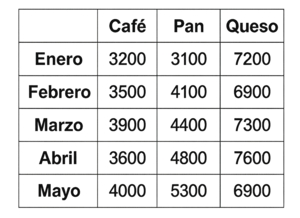

In [ ]:
import pandas as pd

# Datos ficticios de ventas mensuales (en soles)
ventas = {
    'Café': [3200, 3100, 4000, 2900, 3600],
    'Pan': [1500, 1600, 1400, 1550, 1650],
    'Queso': [7200, 8000, 7500, 7700, 6900]
}

# Crear el DataFrame
ventas_df = pd.DataFrame(ventas,
                         index=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo'])
ventas_df

,Café,Pan,Queso
Enero,3200,1500,7200
Febrero,3100,1600,8000
Marzo,4000,1400,7500
Abril,2900,1550,7700
Mayo,3600,1650,6900


###Media y mediana

Utilizando df.mean() y df.median() se puede acceder a las medidas básicas de tendencia central. El resultado muestra la media y mediana de cada columna.

In [ ]:
# Media y mediana
media_ventas = ventas_df.mean()
mediana_ventas = ventas_df.median()

print("Tendencia central:")
print("Media de ventas:")
print(media_ventas)

print("\nMediana de ventas:")
print(mediana_ventas)

Tendencia central:
Media de ventas:
Café     3360.0
Pan      1540.0
Queso    7460.0
dtype: float64

Mediana de ventas:
Café     3200.0
Pan      1550.0
Queso    7500.0
dtype: float64


### Valores de dispersión

1. Mínimo y Máximo: Los valores más pequeños y más grandes de los datos, respectivamente, ofrecen información sobre el rango de valores presentes.

2. Rango: La diferencia entre los valores máximos y mínimos, que indica la dispersión de los datos.

3. Desviación Estándar: Mide la dispersión de los puntos de datos alrededor de la media, lo que proporciona información sobre la variabilidad del conjunto de datos.

4. Varianza: El promedio de las diferencias al cuadrado con respecto a la media, que ofrece otra medida de la dispersión de los datos.


In [ ]:
# Mínimo, máximo, rango, desviación estándar y varianza
min_ventas = ventas_df.min()
max_ventas = ventas_df.max()
rango_ventas = max_ventas - min_ventas
desv_std_ventas = ventas_df.std()
varianza_ventas = ventas_df.var()

print("\nDispersión:")
print("Valor mínimo:")
print(min_ventas)

print("\nValor máximo:")
print(max_ventas)

print("\nRango (máx - mín):")
print(rango_ventas)

print("\nDesviación estándar:")
print(desv_std_ventas)

print("\nVarianza:")
print(varianza_ventas)


Dispersión:
Valor mínimo:
Café     2900
Pan      1400
Queso    6900
dtype: int64

Valor máximo:
Café     4000
Pan      1650
Queso    8000
dtype: int64

Rango (máx - mín):
Café     1100
Pan       250
Queso    1100
dtype: int64

Desviación estándar:
Café     439.317653
Pan       96.176920
Queso    427.784993
dtype: float64

Varianza:
Café     193000.0
Pan        9250.0
Queso    183000.0
dtype: float64


### Estadísticas de posición

1. Percentiles: Valores por debajo de los cuales se encuentra un determinado porcentaje de puntos de datos, lo que proporciona información sobre la distribución del conjunto de datos.

1. Cuartiles: Valores que dividen el conjunto de datos en cuatro partes iguales, cada una con el 25 % de los datos, lo que indica la dispersión del conjunto de datos.


In [ ]:
# Percentiles y cuartiles
percentiles = ventas_df.quantile([0.01, 0.1, 0.4, 0.99])
cuartiles = ventas_df.quantile([0.25, 0.5, 0.75]) #Se ingresa los caurtiles/percentiles de interés (valores menores que 1) a modo de lista

print("\nPercentiles (1%, 10%, 40%, 99%):")
print(percentiles)

print("\nCuartiles (Q1, Q2, Q3):")
print(cuartiles)


Percentiles (1%, 10%, 40%, 99%):
        Café     Pan   Queso
0.01  2908.0  1404.0  6912.0
0.10  2980.0  1440.0  7020.0
0.40  3160.0  1530.0  7380.0
0.99  3984.0  1648.0  7988.0

Cuartiles (Q1, Q2, Q3):
        Café     Pan   Queso
0.25  3100.0  1500.0  7200.0
0.50  3200.0  1550.0  7500.0
0.75  3600.0  1600.0  7700.0


### El método `describe()`

`describe()` genera estadísticas descriptivas que resumen la tendencia central, la dispersión y la forma del conjunto de datos, incluidos el recuento, la media, la desviación estándar, el mínimo, el máximo y los percentiles.

In [ ]:
ventas_df

,Café,Pan,Queso
Enero,3200,1500,7200
Febrero,3100,1600,8000
Marzo,4000,1400,7500
Abril,2900,1550,7700
Mayo,3600,1650,6900


In [ ]:
resumen = ventas_df.describe()

print("\nResumen con describe():")
resumen


Resumen con describe():


,Café,Pan,Queso
count,5.000000,5.00000,5.000000
mean,3360.000000,1540.00000,7460.000000
std,439.317653,96.17692,427.784993
min,2900.000000,1400.00000,6900.000000
25%,3100.000000,1500.00000,7200.000000
50%,3200.000000,1550.00000,7500.000000
75%,3600.000000,1600.00000,7700.000000
max,4000.000000,1650.00000,8000.000000


#### Ejercicio


In [ ]:
# Según los datos del ejemplo
datos = {
    'ID': [1, 2, 3, 4, 5],
    'Edad': [25, 30, 35, 40, 45],
    'Altura (cm)': [162, 168, 174, 180, 186],
    'Peso (kg)': [60, 68, 72, 78, 85]
}

df = pd.DataFrame(datos)
# Calcular el rango de alturas


##### Solución

In [ ]:
rango_altura = df['Altura (cm)'].max() - df['Altura (cm)'].min() #Se accede al máximo valor de la columna altura y se resta con el mínimo
print("\nRango de alturas:", rango_altura, "cm")


Rango de alturas: 24 cm


# Acceso a elementos del DataFrame

De forma similar a la indexación basada en etiquetas, Pandas ofrece dos métodos para acceder a elementos mediante índices enteros:

- `.iloc[]`: Este es el indexador de propósito general para acceder a filas, columnas o ambas por posición de índice.
- `.iat[]`: Esta es una versión optimizada de `.iloc[]` específicamente para acceder o modificar un único valor escalar (una sola celda) mediante indexación entera. Al igual que `.at[]`, es más rápido que `.iloc[]` para el acceso a una sola celda.

El acceso es muy parecido a lo ya visto en Series.


In [ ]:
import pandas as pd

# DataFrame de ejemplo
datos = {
    'A': [10, 20, 30],
    'B': [40, 50, 60],
    'C': [70, 80, 90]
}

df = pd.DataFrame(datos, index=['Fila1', 'Fila2', 'Fila3'])
print(df)
# Acceso a fila por posición
print('\n')
print("Fila en posición 1:")
print(df.iloc[1]) #Posición es con iloc

# Acceso a varias filas
print("\nFilas en posición 0 y 2:")
print(df.iloc[[0, 2]])

# Acceso a una columna por posición
print("\nColumna en posición 1:")
print(df.iloc[:, 1])

# Acceso a múltiples columnas
print("\nColumnas en posición 0 y 2:")
print(df.iloc[:, [0, 2]])

# Acceso a un subconjunto (sub-DataFrame)
print("\nSubconjunto: filas 0 y 2, columnas 1 y 2:")
print(df.iloc[[0, 2], [1, 2]])

# Acceso a una celda puntual con iloc
print("\nCelda en fila 1, columna 1 (con iloc):")
print(df.iloc[1, 1])

# Acceso a una celda puntual con iat
print("\nCelda en fila 1, columna 1 (con iat):")
print(df.iat[1, 1]) #Recuerda que con iat se accede más rápido a un elemento puntual

        A   B   C
Fila1  10  40  70
Fila2  20  50  80
Fila3  30  60  90


Fila en posición 1:
A    20
B    50
C    80
Name: Fila2, dtype: int64

Filas en posición 0 y 2:
        A   B   C
Fila1  10  40  70
Fila3  30  60  90

Columna en posición 1:
Fila1    40
Fila2    50
Fila3    60
Name: B, dtype: int64

Columnas en posición 0 y 2:
        A   C
Fila1  10  70
Fila2  20  80
Fila3  30  90

Subconjunto: filas 0 y 2, columnas 1 y 2:
        B   C
Fila1  40  70
Fila3  60  90

Celda en fila 1, columna 1 (con iloc):
50

Celda en fila 1, columna 1 (con iat):
50


#### Ejercicio

Dado el siguiente `DataFrame` con temperaturas promedio (°C) para tres ciudades y tres días de la semana:



In [ ]:
df = pd.DataFrame({
    'Lima': [22, 23, 21],
    'Bogotá': [14, 15, 13],
    'Buenos Aires': [18, 19, 17]
}, index=['Lunes', 'Martes', 'Miércoles'])
df

,Lima,Bogotá,Buenos Aires
Lunes,22,14,18
Martes,23,15,19
Miércoles,21,13,17


1. Accede a la temperatura de Bogotá el día miércoles usando índices.

2. Accede a las temperaturas de todas las ciudades los días lunes y miércoles usando índice de filas.

##### Solución:

In [ ]:
import pandas as pd

# DataFrame de temperaturas
df = pd.DataFrame({
    'Lima': [22, 23, 21],
    'Bogotá': [14, 15, 13],
    'Buenos Aires': [18, 19, 17]
}, index=['Lunes', 'Martes', 'Miércoles'])

# 1. Temperatura de Bogotá el miércoles
# Fila 2 (índice 2 = 'Miércoles'), Columna 1 (índice 1 = 'Bogotá')
temp_bogota_miercoles = df.iloc[2, 1]
print("Temperatura en Bogotá el miércoles:", temp_bogota_miercoles, "°C")

# 2. Temperaturas de todas las ciudades el lunes y miércoles
# Filas 0 y 2 (Lunes y Miércoles), todas las columnas
temps_lunes_miercoles = df.iloc[[0, 2], :]
print("\nTemperaturas en todas las ciudades (lunes y miércoles):")
print(temps_lunes_miercoles)

Temperatura en Bogotá el miércoles: 13 °C

Temperaturas en todas las ciudades (lunes y miércoles):
           Lima  Bogotá  Buenos Aires
Lunes        22      14            18
Miércoles    21      13            17


# Estadística descriptiva para columnas categóricas

Los datos categóricos requieren técnicas especializadas de análisis. Para esto se utilizan métodos como value_counts(), unique() y nunique() para analizar y resumir datos categóricos eficazmente.

Las columnas categóricas también pueden analizarse con estadísticas simples que ayudan a entender la distribución de sus valores. Tres métodos clave son:

- **`value_counts()`**: muestra cuántas veces aparece cada valor único.  
- **`unique()`**: devuelve un arreglo con todos los valores distintos presentes.  
- **`nunique()`**: indica cuántos valores únicos existen (cardinalidad de la categoría).

Para el ejemplo se utilizará un DataFrame que representa las notas de los estudiantes por materia.

In [ ]:
# Datos de ejemplo: calificaciones de estudiantes por curso
notas = {
    'ID_Alumno': [1, 2, 3, 4, 5, 6],
    'Curso': ['Matemática', 'Ciencia', 'Matemática',
              'Lengua', 'Ciencia', 'Lengua'],
    'Nota': [18, 12, 15, 9, 19, 14]  # Notas sobre 20
}

# Crear el DataFrame
df_notas = pd.DataFrame(notas)
df_notas

,ID_Alumno,Curso,Nota
0,1,Matemática,18
1,2,Ciencia,12
2,3,Matemática,15
3,4,Lengua,9
4,5,Ciencia,19
5,6,Lengua,14


In [ ]:
# Conteo de cursos (frecuencia de cada categoría)
print("Cantidad de alumnos por curso:")
print(df_notas['Curso'].value_counts())

Cantidad de alumnos por curso:
Curso
Matemática    2
Ciencia       2
Lengua        2
Name: count, dtype: int64


In [ ]:
# Valores únicos en cada columna
print("\nCursos disponibles:", df_notas['Curso'].unique())
print("Notas únicas registradas:", df_notas['Nota'].unique())


Cursos disponibles: ['Matemática' 'Ciencia' 'Lengua']
Notas únicas registradas: [18 12 15  9 19 14]


In [ ]:
# Número de categorías únicas
print("\nCantidad de cursos distintos:", df_notas['Curso'].nunique())
print("Cantidad de notas distintas:", df_notas['Nota'].nunique())


Cantidad de cursos distintos: 3
Cantidad de notas distintas: 6


#### Ejercicio
Considerando el siguiente Dataset:
1. Cuenta cuántas personas hay en cada categoría de estado civil.

In [ ]:
#Dataset
datos = {
    'ID': [1, 2, 3, 4, 5],
    'Género': ['Masculino', 'Femenino', 'Masculino', 'Femenino', 'Masculino'],
    'Educación': ['Universitario', 'Universitario', 'Universitario',
                  'Posgrado', 'Posgrado'],
    'Estado Civil': ['Soltero', 'Casado', 'Casado', 'Soltero', 'Divorciado']
}
df = pd.DataFrame(datos)
print(df)

   ID     Género      Educación Estado Civil
0   1  Masculino  Universitario      Soltero
1   2   Femenino  Universitario       Casado
2   3  Masculino  Universitario       Casado
3   4   Femenino       Posgrado      Soltero
4   5  Masculino       Posgrado   Divorciado


##### Solución:

In [ ]:
# value_counts() cuenta la frecuencia de cada categoría
conteo_estados = df['Estado Civil'].value_counts()

# También puedes usar argumentos como normalize=True para porcentajes
# Ejemplo: df['Estado Civil'].value_counts(normalize=True)

print("Frecuencia de estados civiles:")
print(conteo_estados)

Frecuencia de estados civiles:
Estado Civil
Soltero       2
Casado        2
Divorciado    1
Name: count, dtype: int64


# Operaciones matemáticas

En pandas se admite una amplia gama de operaciones matemáticas, lo que lo convierte en una potente herramienta para la manipulación y el análisis de datos. Estas operaciones se pueden aplicar elemento por elemento, haciendo que pandas tenga que alinear las Series según sus etiquetas de índice, lo que facilita la gestión de datos.

### Operaciones aritméticas básicas
Se pueden aplicar operaciones básicas (+, -, *, /) elemento por elemento en las series. Si las series se alinean según sus etiquetas de índice, Pandas garantiza operaciones precisas.

In [ ]:
import pandas as pd
import numpy as np

s1 = pd.Series([1, 2, 3, 4, 5])
s2 = pd.Series([10, 20, 30, 40, 50])

# Suma
print("Suma:")
print(s1 + s2)

# Resta
print("\nResta:")
print(s1 - s2)

# Multiplicación
print("\nMultiplicación:")
print(s1 * s2)

# División
print("\nDivisión:")
print(s1 / s2)

Suma:
0    11
1    22
2    33
3    44
4    55
dtype: int64

Resta:
0    -9
1   -18
2   -27
3   -36
4   -45
dtype: int64

Multiplicación:
0     10
1     40
2     90
3    160
4    250
dtype: int64

División:
0    0.1
1    0.1
2    0.1
3    0.1
4    0.1
dtype: float64


### Funciones de Numpy
pandas se integra muy bien con NumPy, lo que permite aplicar funciones matemáticas avanzadas.

In [ ]:
# Raíz cuadrada
print("Raíz cuadrada de s1:")
print(np.sqrt(s1)) #Función universal de raiz cuadrada de numpy

# Exponencial
print("\nExponencial de s1:")
print(np.exp(s1)) #Función universal de exponencial de numpy

Raíz cuadrada de s1:
0    1.000000
1    1.414214
2    1.732051
3    2.000000
4    2.236068
dtype: float64

Exponencial de s1:
0      2.718282
1      7.389056
2     20.085537
3     54.598150
4    148.413159
dtype: float64


### Funciones de agregación

Las Series ofrecen métodos para obtener estadísticas básicas de forma rápida:

In [ ]:
print("Suma:", s1.sum()) #suma todos los elementos de la serie

# Métodos estadísticos
print("Promedio:", s1.mean())
print("Desviación estándar:", s1.std())
print("Mínimo:", s1.min())
print("Máximo:", s1.max())

Suma: 15
Promedio: 3.0
Desviación estándar: 1.5811388300841898
Mínimo: 1
Máximo: 5


### Manejo de datos faltantes (NaN)
Cuando operas con Series con índices no coincidentes, pandas los alinea automáticamente, y coloca NaN donde no haya coincidencia:

In [ ]:
s3 = pd.Series([1, 2, 3], index=['a', 'b', 'c'])
s4 = pd.Series([4, 5, 6], index=['b', 'c', 'd'])

# Suma con alineación automática
print(s3 + s4)

#Para reemplazar los valores faltantes (NaN) puedes usar .fillna():
print("\n")
print((s3 + s4).fillna(0))  # Reemplaza NaN con 0

a    NaN
b    6.0
c    8.0
d    NaN
dtype: float64


a    0.0
b    6.0
c    8.0
d    0.0
dtype: float64


### Usar funciones personalizadas con apply()

Puedes aplicar cualquier función personalizada a cada elemento:

In [ ]:
# Definir función
def cuadrado(x):
    return x * x

# Aplicarla a la Series
print(s1.apply(cuadrado))

0     1
1     4
2     9
3    16
4    25
dtype: int64


##### Ejercicio
Realiza las siguientes operaciones con los datos base:

1. Suma las Series s1 y s2.
2. Crea las siguientes Series

- Una `Series` llamada `s4` con los valores `[1, 2, 3]` y los índices `['a', 'b', 'c']`.
- Otra `Series` llamada `s5` con los valores `[4, 5, 6]` y los índices `['b', 'c', 'd']`. Nota que no todas las etiquetas de los índices coinciden

Observa el comportamiento de pandas frente a índices desalineados. Reemplaza los valores NaN por 0.

In [ ]:
### 📋 Datos base

# Series con índices desalineados
s1 = pd.Series([1, 2, 3, 4, 5], index=['a', 'b', 'c', 'd', 'e']) #Nota que los indices tienen los mismos elementos en diferente orden
s2 = pd.Series([10, 20, 30, 40, 50], index=['e', 'd', 'c', 'b', 'a'])

##### Solución:

In [ ]:
# 1. s1 + s2 (pandas alinea por índice)
resultado1 = s1 + s2
print("Resultado de s1 + s2:")
print(resultado1)

# 2. Series con índices parcialmente coincidentes
s4 = pd.Series([1, 2, 3], index=['a', 'b', 'c'])
s5 = pd.Series([4, 5, 6], index=['b', 'c', 'd'])

# s4 y s5 → pandas coloca NaN donde no hay coincidencia
resultado2 = s4 + s5
print("\nResultado de s4 + s5:")
print(resultado2)

# Reemplazao de NaN por 0
resultado2_lleno = (s4 + s5).fillna(0)
print("\nResultado de s4 + s5 con NaN reemplazado por 0:")
print(resultado2_lleno)

Resultado de s1 + s2:
a    51
b    42
c    33
d    24
e    15
dtype: int64

Resultado de s4 + s5:
a    NaN
b    6.0
c    8.0
d    NaN
dtype: float64

Resultado de s4 + s5 con NaN reemplazado por 0:
a    0.0
b    6.0
c    8.0
d    0.0
dtype: float64


# Agrupación y agregación de datos

Los métodos de agregación como `groupby()` en pandas permiten resumir y analizar datos según ciertos criterios. Entre los más comunes se encuentran:

- **`.groupby()`**: divide el `DataFrame` en grupos según una o más columnas, permitiendo operar sobre cada grupo por separado.
- **Funciones de agregación**: como `sum()`, `mean()`, `count()`, `min()`, `max()`, entre otras, para obtener estadísticas resumidas por grupo.
- **Agregación personalizada**: también puedes aplicar funciones definidas por el usuario para cálculos específicos dentro de cada grupo.

In [ ]:
# Crear un DataFrame de prueba
datos = {
    'Grupo': ['A', 'A', 'B', 'B', 'B', 'C', 'C', 'C', 'C'],
    'Valor1': [10, 20, 30, 40, 50, 60, 70, 80, 90],
    'Valor2': [1, 2, 3, 4, 5, 6, 7, 8, 9]
}

df = pd.DataFrame(datos)

print("DataFrame de ejemplo:")
df

DataFrame de ejemplo:


,Grupo,Valor1,Valor2
0,A,10,1
1,A,20,2
2,B,30,3
3,B,40,4
4,B,50,5
5,C,60,6
6,C,70,7
7,C,80,8
8,C,90,9


In [ ]:
# Agrupación por la columna 'Grupo'
agrupado = df.groupby('Grupo').sum() #Se agrupan todas las A, B y C de la columna Grupo

agrupado

,Valor1,Valor2
Grupo,,
A,30,3
B,120,12
C,300,30


In [ ]:
# Cálculo del promedio por grupo
print("\nCálculo del promedio por grupo:")
print(agrupado.mean())


Cálculo del promedio por grupo:
       Valor1  Valor2
Grupo                
A        15.0     1.5
B        40.0     4.0
C        75.0     7.5


In [ ]:
# Cálculo de la suma por grupo
print("\nCálculo de la suma por grupo:")
print(agrupado.sum())


Cálculo de la suma por grupo:
       Valor1  Valor2
Grupo                
A          30       3
B         120      12
C         300      30


In [ ]:
# Cálculo del valor mínimo por grupo
print("\nCálculo del valor mínimo por grupo:")
df.groupby('Grupo').min()


Cálculo del valor mínimo por grupo:


,Valor1,Valor2
Grupo,,
A,10,1
B,30,3
C,60,6


In [ ]:
# Conteo de elementos por grupo
print("\nConteo de elementos por grupo:")
df.groupby('Grupo').size()  # También puedes usar agrupado.count() por columna


Conteo de elementos por grupo:


,0
Grupo,
A,2
B,3
C,4


In [ ]:
# Cálculo de la mediana por grupo
print("\nCálculo de la mediana por grupo:")
print(agrupado.median())


Cálculo de la mediana por grupo:
       Valor1  Valor2
Grupo                
A        15.0     1.5
B        40.0     4.0
C        75.0     7.5


#### Ejercicio
Del siguiente Dataset:

1. Agrupa los datos por ciudad ('Ciudad') y obtén la velocidad mínima del viento para cada una.

In [ ]:
import pandas as pd

# DataFrame de ejemplo
datos = {
    'Ciudad': ['Lima', 'Bogotá', 'Santiago',
               'Lima', 'Bogotá', 'Santiago'],
    'Temperatura': [22, 18, 16, 23, 19, 17],
    'Humedad': [65, 70, 80, 66, 72, 78],
    'Velocidad_Viento': [10, 12, 9, 11, 14, 8]
}

df = pd.DataFrame(datos)
print("Datos climáticos por ciudad:")
df

Datos climáticos por ciudad:


,Ciudad,Temperatura,Humedad,Velocidad_Viento
0,Lima,22,65,10
1,Bogotá,18,70,12
2,Santiago,16,80,9
3,Lima,23,66,11
4,Bogotá,19,72,14
5,Santiago,17,78,8


##### Solución:



In [ ]:
# Agrupación por ciudad y cálculo del mínimo de velocidad de viento
viento_minimo = df.groupby('Ciudad')['Velocidad_Viento'].min()

print("Velocidad mínima del viento por ciudad:")
viento_minimo

Velocidad mínima del viento por ciudad:


,Velocidad_Viento
Ciudad,
Bogotá,12
Lima,10
Santiago,8


<Axes: xlabel='Ciudad'>

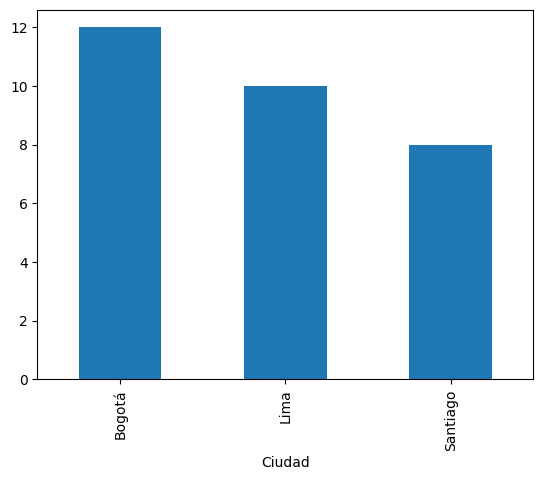

In [ ]:
viento_minimo.plot(kind='bar')

# Manipulación de filas en un DataFrame

Agregar, eliminar, renombrar o modificar filas son operaciones comunes al organizar y limpiar datos.

- **Agregar filas**: se puede usar `.loc[]` para asignar una nueva fila con un índice personalizado y sus valores correspondientes.

- **Eliminar filas**: con `.drop()`, indicando la etiqueta del índice que deseas remover.

- **Renombrar filas**: se utiliza `.rename()` para cambiar el nombre de los índices sin alterar los datos.

- **Modificar valores**: se accede directamente por fila y columna con `.loc[]` y se asigna el nuevo valor.

Estas acciones son clave para mantener un `DataFrame` limpio y estructurado.

In [ ]:
import pandas as pd

# DataFrame de ejemplo
datos = {'Columna1': [1, 2, 3],
         'Columna2': [4, 5, 6]}

df = pd.DataFrame(datos, index=['Fila1', 'Fila2', 'Fila3'])
print("📋 DataFrame original:")
print(df)

📋 DataFrame original:
       Columna1  Columna2
Fila1         1         4
Fila2         2         5
Fila3         3         6


In [ ]:
df

,Columna1,Columna2
Fila1,1,4
Fila2,2,5
Fila3,3,6


In [ ]:
df=df.drop('Fila1')

In [ ]:
df

,Columna1,Columna2
Fila2,2,5
Fila3,3,6


In [ ]:
df.drop('Fila1', inplace=True)

In [ ]:
df

,Columna1,Columna2
Fila2,2,5
Fila3,3,6


In [ ]:
# Adición de una nueva fila
df.loc['Fila0'] = [7, 8] #Con loc se pueden agregar nuevas filas, se requiere la etiqueta y la lista de valores
print("\n Adición de una nueva fila:")
print(df)


 Adición de una nueva fila:
       Columna1  Columna2
Fila1         1         4
Fila2         2         5
Fila3         3         6
Fila0         7         8


In [ ]:
df = df.drop('Fila2') #Con drop se se borra toda la fila que coincida con el nombre de la etiqueta
print("\nEliminación de una fila (sin modificar en el lugar):")
print(df)


Eliminación de una fila (sin modificar en el lugar):
       Columna1  Columna2
Fila1         1         4
Fila3         3         6
Fila0         7         8


In [ ]:
# Eliminación de una fila en el lugar
df.drop('Fila1', inplace=True) # Al activar inplace = true se borra en el mismo lugar
print("\nEliminación de una fila (modificación en el lugar):")
print(df)



Eliminación de una fila (modificación en el lugar):
       Columna1  Columna2
Fila3         3         6
Fila0         7         8


In [ ]:
df

,Columna1,Columna2
Fila3,3,6
Fila0,7,8


In [ ]:
# Cambio de nombre de una fila
df = df.rename(index={'Fila3': 'Fila3_modificada'}) # Rename requiere un diccionario con el nombre actual y el nuevo nombre
print("\n Cambio de nombre de una fila:")
print(df)


 Cambio de nombre de una fila:
                  Columna1  Columna2
Fila2                    2         5
Fila3_modificada         3         6


In [ ]:
# Modificación de un valor específico
df.at['Fila0', 'Columna1'] = 10 # At encuentra el elemento por coordenadas (etiquetas) y lo modifica
print("\n Modificación de un valor puntual:")
print(df)


 Modificación de un valor puntual:
                  Columna1  Columna2
Fila2                  2.0       5.0
Fila3_modificada       3.0       6.0
Fila0                 10.0       NaN


#### Ejercicio
En este ejercicio trabajarás con un `DataFrame` simple y aplicarás distintas operaciones sobre sus filas: adición, eliminación, renombramiento y modificación de valores.

Del siguiente DataFrame:

1. Agrega una nueva fila con índice 'F0', producto 'Huevos' y precio 5.0.

2. Elimina la fila con índice 'F2' y guarda el resultado en un nuevo DataFrame llamado df2.

3. Elimina la fila 'F1' directamente en df2 (usando inplace=True).

4. Cambia el nombre de la fila 'F3' a 'F3_modificada'.

5. Cambia el valor del precio en la fila 'F0' a 5.5.

In [ ]:
import pandas as pd
#Dataframe:
datos = {
    'Producto': ['Pan', 'Leche', 'Queso'],
    'Precio': [3.5, 4.0, 7.2]
}

df = pd.DataFrame(datos, index=['F1', 'F2', 'F3'])
print("DataFrame original:")
print(df)

DataFrame original:
   Producto  Precio
F1      Pan     3.5
F2    Leche     4.0
F3    Queso     7.2


##### Solución:

In [ ]:
import pandas as pd

datos = {
    'Producto': ['Pan', 'Leche', 'Queso'],
    'Precio': [3.5, 4.0, 7.2]
}

df = pd.DataFrame(datos, index=['F1', 'F2', 'F3'])
print(" DataFrame original:")
print(df)

# 1 Adición de una nueva fila con .loc[]
df.loc['F0'] = ['Huevos', 5.0]
print("\n Adición de la fila 'F0':")
print(df)

# 2 Eliminación de la fila 'F2' (sin modificar el original)
df2 = df.drop('F2')
print("\n Eliminación de la fila 'F2' (guardado en df2):")
print(df2)

# 3 Eliminación en el lugar de la fila 'F1'
df2.drop('F1', inplace=True)
print("\n Eliminación en el lugar de la fila 'F1':")
print(df2)

# 4: Cambio de nombre de la fila 'F3'
df2 = df2.rename(index={'F3': 'F3_modificada'})
print("\n Cambio de nombre de la fila 'F3' a 'F3_modificada':")
print(df2)

# 5 Modificación del valor de precio en 'F0'
df2.at['F0', 'Precio'] = 5.5
print("\n Modificación del precio en 'F0':")
print(df2)

 DataFrame original:
   Producto  Precio
F1      Pan     3.5
F2    Leche     4.0
F3    Queso     7.2

 Adición de la fila 'F0':
   Producto  Precio
F1      Pan     3.5
F2    Leche     4.0
F3    Queso     7.2
F0   Huevos     5.0

 Eliminación de la fila 'F2' (guardado en df2):
   Producto  Precio
F1      Pan     3.5
F3    Queso     7.2
F0   Huevos     5.0

 Eliminación en el lugar de la fila 'F1':
   Producto  Precio
F3    Queso     7.2
F0   Huevos     5.0

 Cambio de nombre de la fila 'F3' a 'F3_modificada':
              Producto  Precio
F3_modificada    Queso     7.2
F0              Huevos     5.0

 Modificación del precio en 'F0':
              Producto  Precio
F3_modificada    Queso     7.2
F0              Huevos     5.5


# Manipulación de columnas en un DataFrame

La adición, eliminación, renombramiento y modificación de columnas son operaciones fundamentales para organizar y preparar datos para su análisis.

- **Adición de columnas**: se puede asignar directamente una lista o una `Series`, o usar `.insert()` para ubicarla en una posición específica.

- **Eliminación de columnas**: se utiliza `.drop()` con el nombre de la columna y `axis=1`.

- **Cambio de nombre de columnas**: se aplica `.rename()` con un diccionario que especifique el nombre actual y el nuevo.

- **Modificación de valores**: se accede directamente por nombre de columna e índice de fila para asignar nuevos valores.

In [ ]:
# Creación del DataFrame de ejemplo
datos = {
    'A': [1, 2, 3],
    'B': [4, 5, 6],
    'C': [7, 8, 9]
}

df = pd.DataFrame(datos, index=['X', 'Y', 'Z'])
print("DataFrame original:")
print(df)

DataFrame original:
   A  B  C
X  1  4  7
Y  2  5  8
Z  3  6  9


In [ ]:
# Adición de una nueva columna
df['D'] = [0, 0, 0]
print("\nAdición de la columna 'D':")
print(df)


Adición de la columna 'D':
   A  B  C  D
X  1  4  7  0
Y  2  5  8  0
Z  3  6  9  0


In [ ]:
# Eliminación de una columna por nombre con 'columns'
df = df.drop(columns=['B'])
print("\nEliminación de la columna 'B':")
print(df)


Eliminación de la columna 'B':
   A  C  D
X  1  7  0
Y  2  8  0
Z  3  9  0


In [ ]:
# Eliminación de una columna por nombre con 'axis=1'
df = df.drop('D', axis=1)
print("\nEliminación de la columna 'D':")
print(df)


Eliminación de la columna 'D':
   A  C
X  1  7
Y  2  8
Z  3  9


In [ ]:
# Cambio de nombre de una columna
df = df.rename(columns={'A': 'A_modificada'})
print("\nCambio de nombre de la columna 'A' a 'A_modificada':")
print(df)



Cambio de nombre de la columna 'A' a 'A_modificada':
   A_modificada  C
X             1  7
Y             2  8
Z             3  9


In [ ]:
# Modificación de un valor puntual
df.at['Z', 'A_modificada'] = 10
print("\nModificación del valor en la celda ['Z', 'A_modificada']:")
print(df)


Modificación del valor en la celda ['Z', 'A_modificada']:
   A_modificada  C
X             1  7
Y             2  8
Z            10  9


#### Ejercicio
Practica las operaciones básicas sobre columnas: adición, eliminación, renombramiento y modificación de valores.

Con el siguiente DataFrame realiza las siguientes operaciones:

1. Agrega una nueva columna llamada 'Descuento' con valores [0.5, 1.0, 0.0].

2. Elimina la columna 'Stock'.

3. Renombra la columna 'Precio' a 'Precio_Unitario'.

4. Modifica el valor de 'Descuento' en la fila 'F2' a 1.5.

In [ ]:
import pandas as pd
#Dataframe
datos = {
    'Producto': ['Pan', 'Leche', 'Queso'],
    'Precio': [3.5, 4.0, 7.2],
    'Stock': [10, 5, 8]
}

df = pd.DataFrame(datos, index=['F1', 'F2', 'F3'])
print("DataFrame original:")
print(df)

DataFrame original:
   Producto  Precio  Stock
F1      Pan     3.5     10
F2    Leche     4.0      5
F3    Queso     7.2      8


##### Solución

In [ ]:
import pandas as pd

datos = {
    'Producto': ['Pan', 'Leche', 'Queso'],
    'Precio': [3.5, 4.0, 7.2],
    'Stock': [10, 5, 8]
}

df = pd.DataFrame(datos, index=['F1', 'F2', 'F3'])
print("DataFrame original:")
print(df)

#1: Adición de una nueva columna
df['Descuento'] = [0.5, 1.0, 0.0]
print("\nAdición de la columna 'Descuento':")
print(df)

#2: Eliminación de la columna 'Stock'
df = df.drop(columns=['Stock'])
print("\nEliminación de la columna 'Stock':")
print(df)

#3: Cambio de nombre de la columna 'Precio'
df = df.rename(columns={'Precio': 'Precio_Unitario'})
print("\nCambio de nombre de 'Precio' a 'Precio_Unitario':")
print(df)

#4: Modificación del valor de una celda
df.at['F2', 'Descuento'] = 1.5
print("\nModificación del valor en ['F2', 'Descuento']:")
print(df)

DataFrame original:
   Producto  Precio  Stock
F1      Pan     3.5     10
F2    Leche     4.0      5
F3    Queso     7.2      8

Adición de la columna 'Descuento':
   Producto  Precio  Stock  Descuento
F1      Pan     3.5     10        0.5
F2    Leche     4.0      5        1.0
F3    Queso     7.2      8        0.0

Eliminación de la columna 'Stock':
   Producto  Precio  Descuento
F1      Pan     3.5        0.5
F2    Leche     4.0        1.0
F3    Queso     7.2        0.0

Cambio de nombre de 'Precio' a 'Precio_Unitario':
   Producto  Precio_Unitario  Descuento
F1      Pan              3.5        0.5
F2    Leche              4.0        1.0
F3    Queso              7.2        0.0

Modificación del valor en ['F2', 'Descuento']:
   Producto  Precio_Unitario  Descuento
F1      Pan              3.5        0.5
F2    Leche              4.0        1.5
F3    Queso              7.2        0.0


# Datos vacíos

Poder lidiar con los datos faltantes en Pandas es una habilidad crucial para la limpieza y preparación de datos. Los valores faltantes pueden distorsionar el análisis y generar resultados inexactos, por lo que es fundamental saber cómo detectarlos, completarlos o eliminarlos eficazmente.


Se pueden detectar datos faltantes con `isna()` o `isnull()`, los cuales son equivalentes.

In [ ]:
print("DataFrame original con valores faltantes:")
print(df)

# Detección de valores faltantes
print("\nDetección de valores faltantes (NaN):")
print(df.isna())  # Equivalente a df.isnull()

# Conteo de valores faltantes por columna
print("\nConteo de valores faltantes por columna:")
print(df.isna().sum())

DataFrame original con valores faltantes:
   Columna1  Columna2  Columna3
0       1.0       NaN       1.0
1       2.0       2.0       NaN
2       NaN       3.0       NaN
3       4.0       4.0       4.0

Detección de valores faltantes (NaN):
   Columna1  Columna2  Columna3
0     False      True     False
1     False     False      True
2      True     False      True
3     False     False     False

Conteo de valores faltantes por columna:
Columna1    1
Columna2    1
Columna3    2
dtype: int64


In [ ]:
df

,Columna1,Columna2,Columna3
0,1.0,NaN,1.0
1,2.0,2.0,NaN
2,NaN,3.0,NaN
3,4.0,4.0,4.0


In [ ]:
df.isna().sum()

,0
Columna1,1
Columna2,1
Columna3,2


Se pueden completar datos faltantes con `fillna()`.

In [ ]:
# Relleno de valores faltantes con un valor fijo
df_relleno_cero = df.fillna(0)
print("\nRelleno de NaN con cero:")
print(df_relleno_cero)

# Relleno de valores faltantes con la media de cada columna
df_relleno_media = df.fillna(df.mean())
print("\nRelleno de NaN con la media de cada columna:")
print(df_relleno_media)



Relleno de NaN con cero:
   Columna1  Columna2  Columna3
0       1.0       0.0       1.0
1       2.0       2.0       0.0
2       0.0       3.0       0.0
3       4.0       4.0       4.0

Relleno de NaN con la media de cada columna:
   Columna1  Columna2  Columna3
0  1.000000       3.0       1.0
1  2.000000       2.0       2.5
2  2.333333       3.0       2.5
3  4.000000       4.0       4.0


Puedes eliminar filas o columnas con datos faltantes utilizando `dropna()`.

In [ ]:
# Eliminación de filas con al menos un valor faltante
df_sin_filas_nan = df.dropna()
print("\nEliminación de filas con al menos un NaN:")
print(df_sin_filas_nan)

# Eliminación de columnas con al menos un valor faltante
df_sin_columnas_nan = df.dropna(axis=1)
print("\nEliminación de columnas con al menos un NaN:")
print(df_sin_columnas_nan)

# Eliminación de filas solo si todos los valores son NaN
df_sin_filas_todo_nan = df.dropna(how='all')
print("\nEliminación de filas si todos los valores son NaN:")
print(df_sin_filas_todo_nan)


Eliminación de filas con al menos un NaN:
   Columna1  Columna2  Columna3
3       4.0       4.0       4.0

Eliminación de columnas con al menos un NaN:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3]

Eliminación de filas si todos los valores son NaN:
   Columna1  Columna2  Columna3
0       1.0       NaN       1.0
1       2.0       2.0       NaN
2       NaN       3.0       NaN
3       4.0       4.0       4.0


#### Ejercicio

A continuación, trabajarás con un conjunto de datos que contiene valores faltantes (`NaN`).  
Tu objetivo será identificar estos valores y aplicar distintas estrategias para tratarlos.

Con el siguiente DataFrame realiza:

1. Detecta qué valores están faltando.

2. Cuenta cuántos valores faltantes hay en cada columna.

3. Crea un nuevo DataFrame donde reemplaces los valores faltantes por cero.

4. Crea otro DataFrame donde reemplaces los valores faltantes por la media de su columna.

5. Elimina las filas que contengan al menos un valor faltante.

6. Elimina las filas solo si todos los valores de la fila son faltantes.

In [ ]:
# DataFrame

import pandas as pd
import numpy as np

datos = {
    'Producto': ['Pan', 'Leche', 'Queso', 'Huevos'],
    'Precio': [3.5, np.nan, 7.2, np.nan],
    'Stock': [10, 5, np.nan, np.nan]
}

df = pd.DataFrame(datos)
print("DataFrame con valores faltantes:")
print(df)

DataFrame con valores faltantes:
  Producto  Precio  Stock
0      Pan     3.5   10.0
1    Leche     NaN    5.0
2    Queso     7.2    NaN
3   Huevos     NaN    NaN


##### Solución:


In [ ]:
import pandas as pd
import numpy as np

#  DataFrame original
datos = {
    'Producto': ['Pan', 'Leche', 'Queso', 'Huevos'],
    'Precio': [3.5, np.nan, 7.2, np.nan],
    'Stock': [10, 5, np.nan, np.nan]
}

df = pd.DataFrame(datos)
print("DataFrame original con valores faltantes:")
print(df)

# 1: Detección de valores faltantes
print("\nDetección de valores faltantes (NaN):")
print(df.isna())

# 2: Conteo de valores faltantes por columna
print("\nConteo de valores faltantes por columna:")
print(df.isna().sum())

# 3: Relleno de valores faltantes con cero
df_relleno_cero = df.fillna(0)
print("\nDataFrame con NaN reemplazados por 0:")
print(df_relleno_cero)

# 4: Relleno de valores faltantes con la media de la columna
df_relleno_media = df.fillna(df.mean(numeric_only=True))
print("\nDataFrame con NaN reemplazados por la media:")
print(df_relleno_media)

# 5: Eliminación de filas con al menos un NaN
df_sin_nan = df.dropna()
print("\nEliminación de filas con al menos un NaN:")
print(df_sin_nan)

# 6: Eliminación de filas solo si todos los valores son NaN
df_sin_filas_vacias = df.dropna(how='all')
print("\nEliminación de filas si todos los valores son NaN:")
print(df_sin_filas_vacias)

DataFrame original con valores faltantes:
  Producto  Precio  Stock
0      Pan     3.5   10.0
1    Leche     NaN    5.0
2    Queso     7.2    NaN
3   Huevos     NaN    NaN

Detección de valores faltantes (NaN):
   Producto  Precio  Stock
0     False   False  False
1     False    True  False
2     False   False   True
3     False    True   True

Conteo de valores faltantes por columna:
Producto    0
Precio      2
Stock       2
dtype: int64

DataFrame con NaN reemplazados por 0:
  Producto  Precio  Stock
0      Pan     3.5   10.0
1    Leche     0.0    5.0
2    Queso     7.2    0.0
3   Huevos     0.0    0.0

DataFrame con NaN reemplazados por la media:
  Producto  Precio  Stock
0      Pan    3.50   10.0
1    Leche    5.35    5.0
2    Queso    7.20    7.5
3   Huevos    5.35    7.5

Eliminación de filas con al menos un NaN:
  Producto  Precio  Stock
0      Pan     3.5   10.0

Eliminación de filas si todos los valores son NaN:
  Producto  Precio  Stock
0      Pan     3.5   10.0
1    Leche   

# Datos duplicados

Los duplicados que se encuentran en el conjunto de datos pueden generar análisis sesgados y conclusiones incorrectas. Estos se pueden detectar mediante el método `duplicated()`. Este método devuelve una serie booleana que indica si cada fila está duplicada o no.

In [ ]:
# Creación de un DataFrame con filas duplicadas
datos = {
    'Nombre': ['Ana', 'Luis', 'Luis', 'Luis', 'Carlos'],
    'Edad': [25, 30, 30, 30, 40],
    'Ciudad': ['Lima', 'Cusco', 'Cusco', 'Arequipa', 'Piura']
}

df = pd.DataFrame(datos)
print("DataFrame original:")
df

DataFrame original:


,Nombre,Edad,Ciudad
0,Ana,25,Lima
1,Luis,30,Cusco
2,Luis,30,Cusco
3,Luis,30,Arequipa
4,Carlos,40,Piura


In [ ]:
# Detección de filas duplicadas completas
duplicados = df.duplicated()
print("\nFilas duplicadas (todas las columnas):")
print(duplicados)


Filas duplicadas (todas las columnas):
0    False
1    False
2     True
3    False
4    False
dtype: bool


In [ ]:
# Eliminación de duplicados (mantiene la primera ocurrencia)
df_sin_duplicados = df.drop_duplicates()
print("\nDataFrame sin duplicados (por defecto):")
print(df_sin_duplicados)


DataFrame sin duplicados (por defecto):
   Nombre  Edad    Ciudad
0     Ana    25      Lima
1    Luis    30     Cusco
3    Luis    30  Arequipa
4  Carlos    40     Piura


In [ ]:
# Eliminación de duplicados considerando solo la columna 'Nombre'
df_sin_duplicados_nombre = df.drop_duplicates(subset='Nombre')
print("\nEliminación de duplicados según la columna 'Nombre':")
print(df_sin_duplicados_nombre)


Eliminación de duplicados según la columna 'Nombre':
   Nombre  Edad Ciudad
0     Ana    25   Lima
1    Luis    30  Cusco
4  Carlos    40  Piura


The `drop_duplicates()` method removes duplicate rows from a DataFrame. By default, it keeps the first occurrence of each duplicate row and drops the rest.

In [ ]:
# Eliminación de duplicados conservando la última ocurrencia
df_ultimo = df.drop_duplicates(keep='last')
print("\nEliminación de duplicados conservando la última ocurrencia:")
print(df_ultimo)


Eliminación de duplicados conservando la última ocurrencia:
   Nombre  Edad    Ciudad
0     Ana    25      Lima
2    Luis    30     Cusco
3    Luis    30  Arequipa
4  Carlos    40     Piura


#### Ejercicio

Con el DataFrame, responde las siguientes preguntas usando código:

1. ¿Qué filas están completamente duplicadas?

2. Elimina las filas duplicadas (conservando la primera aparición).

3. Elimina las filas duplicadas considerando solo la columna 'Producto'.

4. Elimina los duplicados conservando la última ocurrencia.

5. Elimina duplicados directamente sobre el mismo DataFrame (en el lugar)

In [ ]:
#Dataframe
import pandas as pd

datos = {
    'Producto': ['Pan', 'Leche', 'Leche', 'Queso', 'Pan'],
    'Precio': [3.5, 4.0, 4.0, 7.2, 3.5],
    'Sucursal': ['A', 'B', 'B', 'C', 'A']
}

df = pd.DataFrame(datos)
print("DataFrame original:")
print(df)

DataFrame original:
  Producto  Precio Sucursal
0      Pan     3.5        A
1    Leche     4.0        B
2    Leche     4.0        B
3    Queso     7.2        C
4      Pan     3.5        A


##### Solución:


In [ ]:
import pandas as pd

datos = {
    'Producto': ['Pan', 'Leche', 'Leche', 'Queso', 'Pan'],
    'Precio': [3.5, 4.0, 4.0, 7.2, 3.5],
    'Sucursal': ['A', 'B', 'B', 'C', 'A']
}

df = pd.DataFrame(datos)
print("DataFrame original:")
print(df)

# 1: Detección de filas completamente duplicadas
duplicados_completos = df.duplicated()
print("\nFilas completamente duplicadas:")
print(duplicados_completos)

# 2: Eliminación de duplicados completos (conserva la primera ocurrencia)
df_sin_duplicados = df.drop_duplicates()
print("\nDataFrame sin duplicados (por defecto):")
print(df_sin_duplicados)

# 3: Eliminación de duplicados basados solo en la columna 'Producto'
df_unico_producto = df.drop_duplicates(subset='Producto')
print("\nEliminación de duplicados según 'Producto':")
print(df_unico_producto)

# 4: Eliminación de duplicados conservando la última ocurrencia
df_ultimo = df.drop_duplicates(keep='last')
print("\nEliminación de duplicados conservando la última aparición:")
print(df_ultimo)

# 5: Eliminación de duplicados en el mismo DataFrame (inplace)
df.drop_duplicates(inplace=True)
print("\nDataFrame después de eliminar duplicados en el lugar:")
print(df)

DataFrame original:
  Producto  Precio Sucursal
0      Pan     3.5        A
1    Leche     4.0        B
2    Leche     4.0        B
3    Queso     7.2        C
4      Pan     3.5        A

Filas completamente duplicadas:
0    False
1    False
2     True
3    False
4     True
dtype: bool

DataFrame sin duplicados (por defecto):
  Producto  Precio Sucursal
0      Pan     3.5        A
1    Leche     4.0        B
3    Queso     7.2        C

Eliminación de duplicados según 'Producto':
  Producto  Precio Sucursal
0      Pan     3.5        A
1    Leche     4.0        B
3    Queso     7.2        C

Eliminación de duplicados conservando la última aparición:
  Producto  Precio Sucursal
2    Leche     4.0        B
3    Queso     7.2        C
4      Pan     3.5        A

DataFrame después de eliminar duplicados en el lugar:
  Producto  Precio Sucursal
0      Pan     3.5        A
1    Leche     4.0        B
3    Queso     7.2        C


# Unión de DataFrames con `merge()`

La función `pd.merge()` permite **combinar DataFrames** en pandas de forma similar a las uniones en bases de datos. La combinación se realiza a partir de **claves comunes** (columnas).

### Tipos de unión disponibles:
- `'inner'`: solo filas con claves coincidentes en ambos DataFrames.
- `'outer'`: todas las filas de ambos DataFrames; rellena con `NaN` si no hay coincidencia.
- `'left'`: todas las filas del DataFrame izquierdo y las coincidentes del derecho.
- `'right'`: todas las filas del DataFrame derecho y las coincidentes del izquierdo.

In [ ]:
# Unión interna
inner = pd.merge(df1, df2, on='Clave', how='inner')
print("Unión interna:")
print(inner)

Unión interna:
  Clave  Valor1  Valor2
0     B       2       4
1     C       3       5


In [ ]:
import pandas as pd

#DataFrames de ejemplo:

df1 = pd.DataFrame({'Clave': ['A', 'B', 'C'], 'Valor1': [1, 2, 3]})
df2 = pd.DataFrame({'Clave': ['B', 'C', 'D'], 'Valor2': [4, 5, 6]})
print(df1)
print(df2)

  Clave  Valor1
0     A       1
1     B       2
2     C       3
  Clave  Valor2
0     B       4
1     C       5
2     D       6


In [ ]:
# Unión externa
outer = pd.merge(df1, df2, on='Clave', how='outer')
print("\nUnión externa:")
print(outer)


Unión externa:
  Clave  Valor1  Valor2
0     A     1.0     NaN
1     B     2.0     4.0
2     C     3.0     5.0
3     D     NaN     6.0


In [ ]:
# Unión por la izquierda
left = pd.merge(df1, df2, on='Clave', how='left')
print("\nUnión izquierda:")
print(left)


Unión izquierda:
  Clave  Valor1  Valor2
0     A       1     NaN
1     B       2     4.0
2     C       3     5.0


In [ ]:
# Unión por la derecha
right = pd.merge(df1, df2, on='Clave', how='right')
print("\nUnión derecha:")
print(right)


Unión derecha:
  Clave  Valor1  Valor2
0     B     2.0       4
1     C     3.0       5
2     D     NaN       6


# Concatenación de DataFrames con `pd.concat()`

La función `pd.concat()` permite combinar DataFrames apilándolos vertical u horizontalmente, según el eje que se indique:

- `axis=0`: apilado vertical (por filas)
- `axis=1`: apilado horizontal (por columnas)

In [ ]:
import pandas as pd

# DataFrames de ejemplo
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]})
print(df1)
print(df2)

   A  B
0  1  3
1  2  4
   A  B
0  5  7
1  6  8


In [ ]:
# Apilado vertical
vertical = pd.concat([df1, df2], axis=0)
print("Concatenación vertical:")
print(vertical)

Concatenación vertical:
   A  B
0  1  3
1  2  4
0  5  7
1  6  8


In [ ]:
# Apilado horizontal
horizontal = pd.concat([df1, df2], axis=1)
print("\nConcatenación horizontal:")
print(horizontal)


Concatenación horizontal:
   A  B  A  B
0  1  3  5  7
1  2  4  6  8


# Caso de uso Pandas : EDA

1.   Elemento de lista
2.   Elemento de lista



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Cargando el dataset

In [ ]:
import pandas as pd
data_ruta= ('/content/drive/MyDrive/UTEC - DATA/census-income_output.txt')
dataset=pd.read_csv(data_ruta,delimiter=",")

In [ ]:
dataset.head()

,age,class of worker,detailed industry code,detailed occupation code,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,...,country of birth mother,country of birth self,citizenship,own business or self employed code,fill inc questionnaire for veteran's admin,veterans benefits code,weeks worked in year,year,taxable income amount,key
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,0,1
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,0,2
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,0,3
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,0,4
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,0,5


In [ ]:
dataset.shape

(199523, 43)

In [ ]:
dataset.isna().sum()

,0
age,0
class of worker,0
detailed industry code,0
detailed occupation code,0
education,0
wage per hour,0
enroll in edu inst last wk,0
marital stat,0
major industry code,0
major occupation code,0


In [ ]:
dataset.head(2).T

,0,1
age,73,58
class of worker,Not in universe,Self-employed-not incorporated
detailed industry code,0,4
detailed occupation code,0,34
education,High school graduate,Some college but no degree
wage per hour,0,0
enroll in edu inst last wk,Not in universe,Not in universe
marital stat,Widowed,Divorced
major industry code,Not in universe or children,Construction
major occupation code,Not in universe,Precision production craft & repair


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 43 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   age                                         199523 non-null  int64  
 1   class of worker                             199523 non-null  object 
 2   detailed industry code                      199523 non-null  int64  
 3   detailed occupation code                    199523 non-null  int64  
 4   education                                   199523 non-null  object 
 5   wage per hour                               199523 non-null  int64  
 6   enroll in edu inst last wk                  199523 non-null  object 
 7   marital stat                                199523 non-null  object 
 8   major industry code                         199523 non-null  object 
 9   major occupation code                       199523 non-null  object 
 

In [ ]:
dataset.describe()

,age,detailed industry code,detailed occupation code,wage per hour,capital gains,capital losses,dividends from stocks,instance weight,num persons worked for employer,own business or self employed code,veterans benefits code,weeks worked in year,year,taxable income amount,key
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1740.380269,1.956180,0.175438,1.514833,23.174897,94.499672,0.062058,99762.000000
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,993.768156,2.365126,0.553694,0.851473,24.411488,0.500001,0.241261,57597.473217
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,37.870000,0.000000,0.000000,0.000000,0.000000,94.000000,0.000000,1.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1061.615000,0.000000,0.000000,2.000000,0.000000,94.000000,0.000000,49881.500000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1618.310000,1.000000,0.000000,2.000000,8.000000,94.000000,0.000000,99762.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,2188.610000,4.000000,0.000000,2.000000,52.000000,95.000000,0.000000,149642.500000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,95.000000,1.000000,199523.000000


In [ ]:
dataset.isna().sum()/dataset.shape[0]

,0
age,0.00000
class of worker,0.00000
detailed industry code,0.00000
detailed occupation code,0.00000
education,0.00000
wage per hour,0.00000
enroll in edu inst last wk,0.00000
marital stat,0.00000
major industry code,0.00000
major occupation code,0.00000


In [ ]:
dataset.isna().sum()/dataset.shape[0]

,0
age,0.00000
class of worker,0.00000
detailed industry code,0.00000
detailed occupation code,0.00000
education,0.00000
wage per hour,0.00000
enroll in edu inst last wk,0.00000
marital stat,0.00000
major industry code,0.00000
major occupation code,0.00000


# Centralizar todos la informacion de los datos

In [ ]:
def get_type(value):
    return type(value)
unique_values={}

for column in dataset.columns:
    num_unique = len(set(dataset[column]))
    percentage_unique = num_unique / dataset.shape[0]
    nan_values = dataset[column].isna().sum()
    nan_values_percentage= nan_values / dataset.shape[0]
    type_column = mode(map(get_type, set(dataset[column])))

    unique_values[column] = [num_unique, percentage_unique, nan_values, nan_values_percentage, type_column]

result_df = pd.DataFrame.from_dict(unique_values, orient='index', columns=['unique values', 'percentage', 'nan values count', 'nan values percentage', 'type'])
result_df


,unique values,percentage,nan values count,nan values percentage,type
age,91,0.000456,0,0.00000,<class 'int'>
class of worker,9,0.000045,0,0.00000,<class 'str'>
detailed industry code,52,0.000261,0,0.00000,<class 'int'>
detailed occupation code,47,0.000236,0,0.00000,<class 'int'>
education,17,0.000085,0,0.00000,<class 'str'>
wage per hour,1240,0.006215,0,0.00000,<class 'int'>
enroll in edu inst last wk,3,0.000015,0,0.00000,<class 'str'>
marital stat,7,0.000035,0,0.00000,<class 'str'>
major industry code,24,0.000120,0,0.00000,<class 'str'>
major occupation code,15,0.000075,0,0.00000,<class 'str'>


# Exploratory Data Analysis

In [ ]:
dataset

,age,class of worker,detailed industry code,detailed occupation code,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,...,country of birth mother,country of birth self,citizenship,own business or self employed code,fill inc questionnaire for veteran's admin,veterans benefits code,weeks worked in year,year,taxable income amount,key
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,0,1
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,0,2
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,0,3
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,0,4
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,87,Not in universe,0,0,7th and 8th grade,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,0,199519
199519,65,Self-employed-incorporated,37,2,11th grade,0,Not in universe,Married-civilian spouse present,Business and repair services,Executive admin and managerial,...,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,0,199520
199520,47,Not in universe,0,0,Some college but no degree,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,...,Poland,Germany,Foreign born- U S citizen by naturalization,0,Not in universe,2,52,95,0,199521
199521,16,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,0,199522


1. Educación e ingresos: ¿Qué tipo de educación tiene la gente que más gana?

In [ ]:
income_by_education = dataset.groupby('education')['taxable income amount'].mean().sort_values(ascending=False)
income_by_education


,taxable income amount
education,
Prof school degree (MD DDS DVM LLB JD),0.540435
Doctorate degree(PhD EdD),0.520190
Masters degree(MA MS MEng MEd MSW MBA),0.311573
Bachelors degree(BA AB BS),0.197080
Associates degree-academic program,0.094430
Associates degree-occup /vocational,0.077081
Some college but no degree,0.064234
High school graduate,0.038817
12th grade no diploma,0.015992


<Axes: title={'center': 'Average Taxable Income by Education Level'}, xlabel='Education Level', ylabel='Average Taxable Income'>

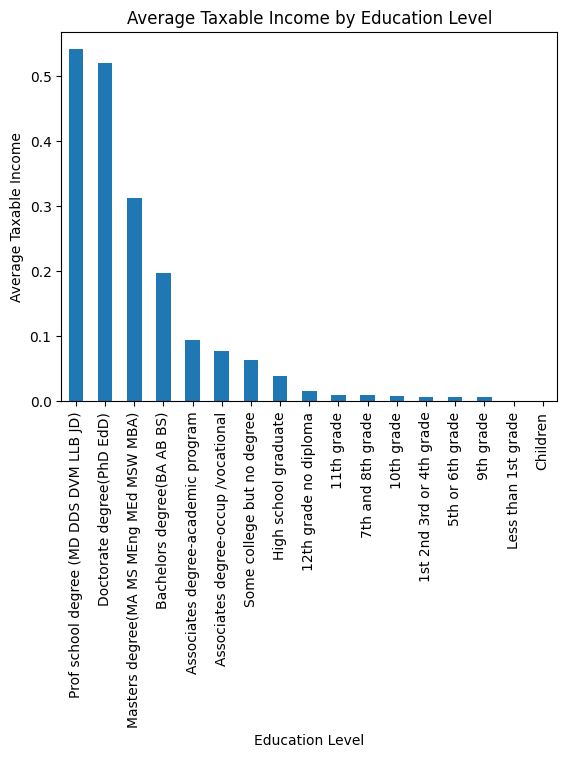

In [ ]:
income_by_education.plot(kind='bar',title='Average Taxable Income by Education Level',   xlabel='Education Level',   ylabel='Average Taxable Income')

2. Salario y género: ¿En qué trabajos ganan más los mujeres que las hombres?

In [ ]:
wage_by_occupation_gender = dataset.groupby(['major occupation code', 'sex'])['wage per hour'].mean().unstack()
wage_by_occupation_gender

sex,Female,Male
major occupation code,,
Adm support including clerical,125.460064,154.918111
Armed Forces,0.000000,0.000000
Executive admin and managerial,78.467945,40.889174
Farming forestry and fishing,41.765751,44.080728
Handlers equip cleaners etc,114.454892,133.473353
Machine operators assmblrs & inspctrs,128.769747,204.861191
Not in universe,0.000000,0.000000
Other service,97.685634,106.407714
Precision production craft & repair,129.793542,173.870788


<Axes: title={'center': 'Average Wage per Hour by Occupation and Gender'}, xlabel='Average Wage per Hour ($)', ylabel='Occupation'>

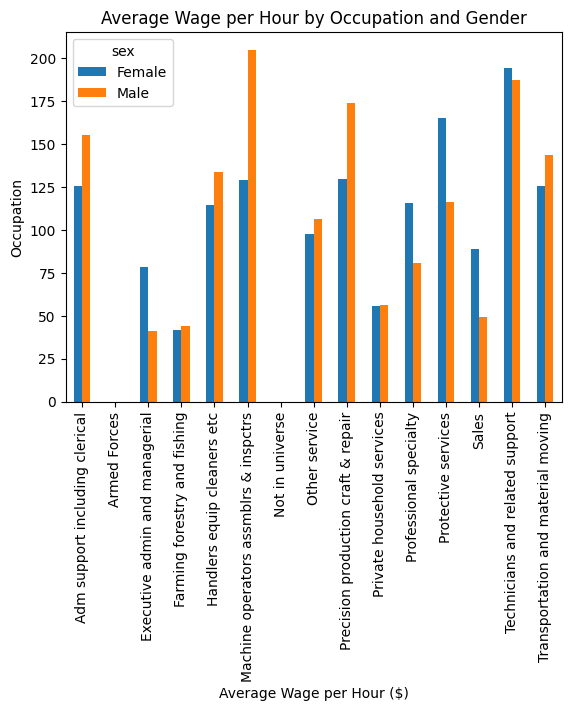

In [ ]:
wage_by_occupation_gender.plot(kind='bar',title='Average Wage per Hour by Occupation and Gender',xlabel='Average Wage per Hour ($)',ylabel='Occupation')

<Axes: xlabel='sex'>

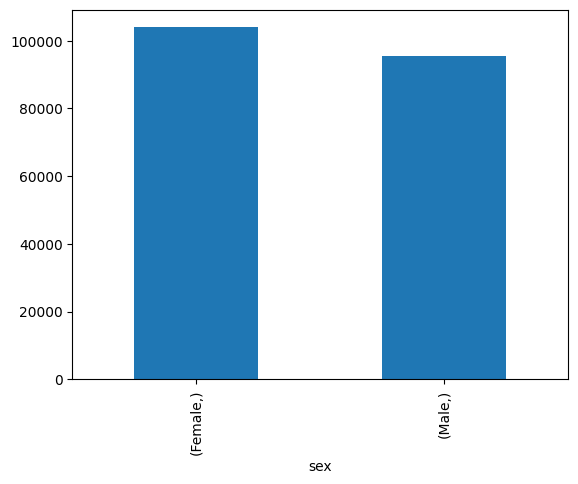

In [ ]:
dataset[['sex']].value_counts().plot(kind='bar')

3. Edad y empleo: ¿A qué edad suele trabajarse tiempo completo?

In [ ]:
employment_by_age = dataset.groupby(['age', 'full or part time employment stat']).size().unstack().fillna(0)
employment_by_age

full or part time employment stat,Children or Armed Forces,Full-time schedules,Not in labor force,PT for econ reasons usually FT,PT for econ reasons usually PT,PT for non-econ reasons usually FT,Unemployed full-time,Unemployed part- time
age,,,,,,,,
0,2839.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3138.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3236.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3279.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3318.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
86,182.0,2.0,162.0,0.0,1.0,1.0,0.0,0.0
87,149.0,0.0,152.0,0.0,0.0,0.0,0.0,0.0
88,119.0,1.0,121.0,0.0,0.0,0.0,0.0,0.0


<Axes: xlabel='age'>

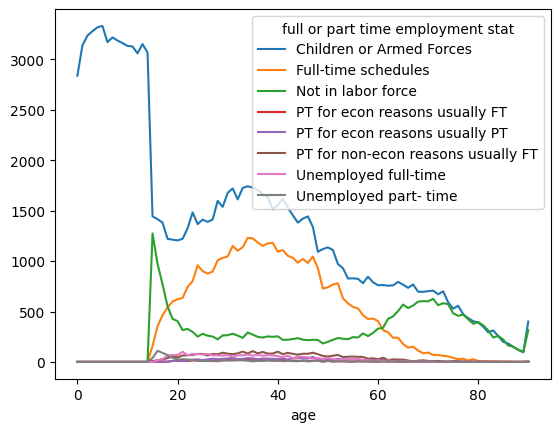

In [ ]:
employment_by_age.plot()

4. Estado civil y dinero: ¿Las personas casadas ganan más dinero que las solteras?

In [ ]:

capital_by_marital = dataset.groupby('marital stat')[['capital gains']].mean()
capital_by_marital

,capital gains
marital stat,
Divorced,591.235248
Married-A F spouse present,378.563910
Married-civilian spouse present,772.635831
Married-spouse absent,515.826087
Never married,102.035023
Separated,379.912139
Widowed,284.348466


<Axes: xlabel='marital stat'>

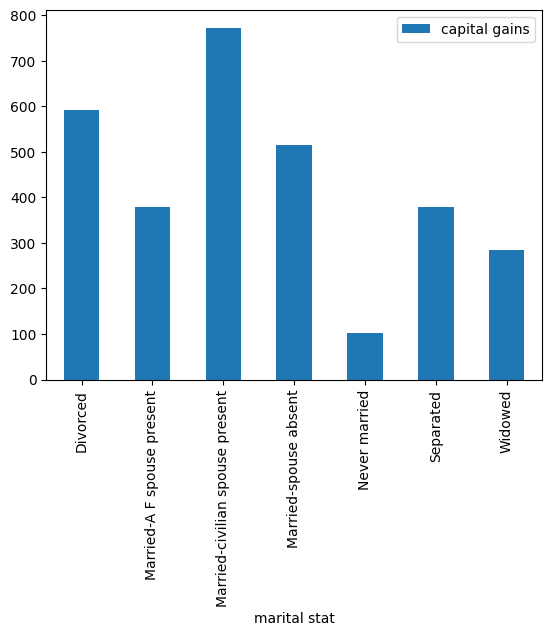

In [ ]:
capital_by_marital.plot(kind='bar')

5. Educación y raza: Que nivel de educacion es mas predominante en todos los grupos raciales?

In [ ]:
education_by_race = dataset.groupby(['race', 'education']).size().fillna(0)
education_by_race

race                         education                             
Amer Indian Aleut or Eskimo  10th grade                                   99
                             11th grade                                  128
                             12th grade no diploma                        32
                             1st 2nd 3rd or 4th grade                     25
                             5th or 6th grade                             26
                                                                       ...  
White                        High school graduate                      41647
                             Less than 1st grade                         592
                             Masters degree(MA MS MEng MEd MSW MBA)     5814
                             Prof school degree (MD DDS DVM LLB JD)     1591
                             Some college but no degree                23874
Length: 85, dtype: int64

In [ ]:
dataset['education'].value_counts()

,count
education,
High school graduate,48407
Children,47422
Some college but no degree,27820
Bachelors degree(BA AB BS),19865
7th and 8th grade,8007
10th grade,7557
11th grade,6876
Masters degree(MA MS MEng MEd MSW MBA),6541
9th grade,6230


In [ ]:

education_bins = {
    'Less than 1st grade': 'Less than High School',
    '1st 2nd 3rd or 4th grade': 'Less than High School',
    '5th or 6th grade': 'Less than High School',
    '7th and 8th grade': 'Less than High School',
    '9th grade': 'Less than High School',
    '10th grade': 'High School',
    '11th grade': 'High School',
    '12th grade no diploma': 'High School',
    'High school graduate': 'High School',
    'Some college but no degree': 'Some College',
    'Associates degree-occup /vocational': 'Associates Degree',
    'Associates degree-academic program': 'Associates Degree',
    'Bachelors degree(BA AB BS)': 'Bachelors Degree',
    'Masters degree(MA MS MEng MEd MSW MBA)': 'Graduate Degree',
    'Prof school degree (MD DDS DVM LLB JD)': 'Graduate Degree',
    'Doctorate degree(PhD EdD)': 'Graduate Degree'
}


dataset['education_group'] = dataset['education'].map(education_bins)


education_by_race = dataset.groupby(['race', 'education_group']).size().unstack().fillna(0)


edu_order = ['Less than High School', 'High School', 'Some College',
             'Associates Degree', 'Bachelors Degree', 'Graduate Degree']
education_by_race = education_by_race[edu_order]

education_by_race

education_group,Less than High School,High School,Some College,Associates Degree,Bachelors Degree,Graduate Degree
race,,,,,,
Amer Indian Aleut or Eskimo,255,730,296,107,83,31
Asian or Pacific Islander,530,1317,749,256,1021,509
Black,2226,7240,2538,750,1080,462
Other,733,916,363,91,162,96
White,16388,54763,23874,8517,17519,8499


<Axes: xlabel='race'>

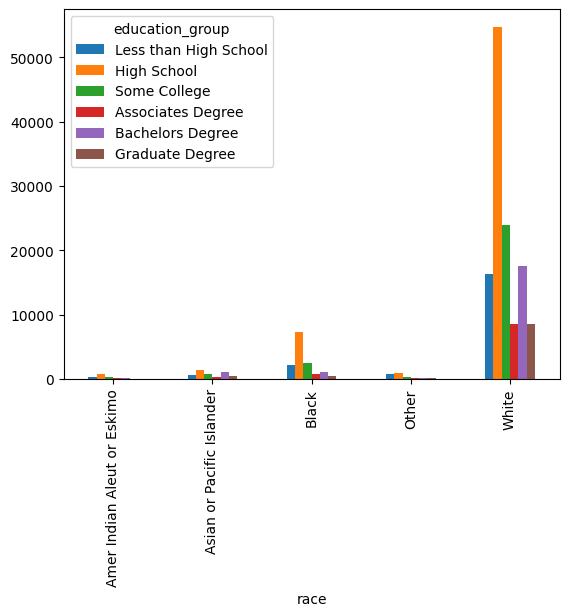

In [ ]:
education_by_race.plot(kind='bar')

6. Industria y desempleo: ¿En qué tipo de trabajos hay más despidos?

In [ ]:
unemployment_by_industry = dataset.groupby(['major industry code', 'reason for unemployment']).size().unstack().fillna(0)

In [ ]:
unemployment_by_industry

reason for unemployment,Job leaver,Job loser - on layoff,New entrant,Not in universe,Other job loser,Re-entrant
major industry code,,,,,,
Agriculture,10.0,75.0,0.0,2790.0,74.0,74.0
Armed Forces,30.0,0.0,0.0,3.0,3.0,0.0
Business and repair services,53.0,42.0,0.0,5200.0,181.0,175.0
Communications,7.0,1.0,0.0,1149.0,16.0,8.0
Construction,29.0,313.0,0.0,5240.0,279.0,123.0
Education,9.0,22.0,0.0,8110.0,37.0,105.0
Entertainment,15.0,23.0,0.0,1514.0,34.0,65.0
Finance insurance and real estate,21.0,14.0,0.0,5961.0,94.0,55.0
Forestry and fisheries,1.0,13.0,0.0,159.0,4.0,10.0


In [ ]:
unemployment_by_industry.drop('Not in universe',axis=1 ,inplace= True)

<Axes: xlabel='major industry code'>

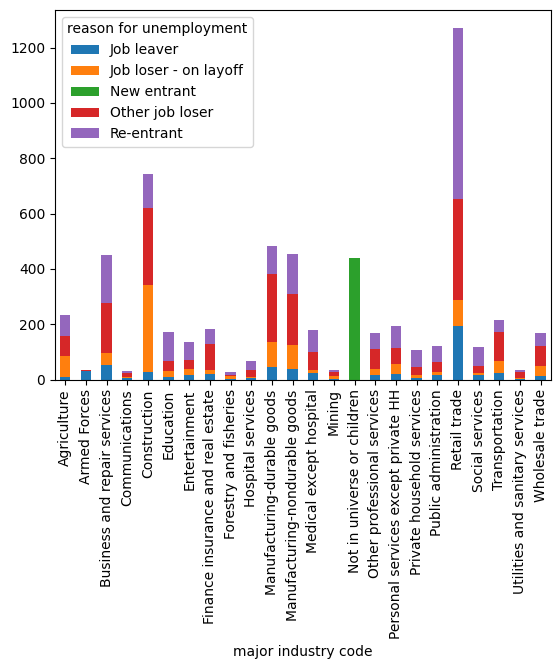

In [ ]:
unemployment_by_industry.plot(kind='bar', stacked=True)